In [2]:
using Pkg
Pkg.add("Clustering")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [aaaa29a8] + Clustering v0.14.3
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


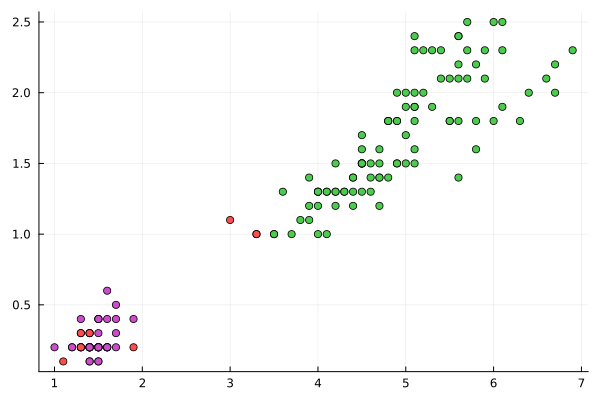

In [7]:
using RDatasets, Clustering, Plots
  
# loading the dataset
iris = dataset("datasets", "iris"); 
  
# features for clustering
features = collect(Matrix(iris[:, 1:4])'); 
  
# result after running K-means for the 3 clusters
result = kmeans(features, 3); 
  
# plotting the result
scatter(iris.PetalLength, iris.PetalWidth, 
        marker_z = result.assignments,
        color =:lightrainbow, legend = false)

Spectral Clustering

In [11]:
Pkg.add("DataFrames")
Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
   Installed Calculus ──────────────── v0.5.1
   Installed Rmath_jll ─────────────── v0.3.0+0
   Installed KernelDensity ─────────── v0.6.5
   Installed PDMats ────────────────── v0.11.16
   Installed StatsPlots ────────────── v0.15.4
   Installed StatsFuns ─────────────── v1.1.1
   Installed DataValues ────────────── v0.4.13
   Installed MultivariateStats ─────── v0.10.0
   Installed Rmath ─────────────────── v0.7.0
   Installed DualNumbers ───────────── v0.6.8
   Installed Arpack_jll ────────────── v3.5.1+1
   Installed TableOperations ───────── v1.2.0
   Installed FillArrays ────────────── v0.13.5
   Installed QuadGK ────────────────── v2.6.0
   Installed Arpack ────────────────── v0.5.4
   Installed DensityInterface ──────── v0.4.0
   Installed Distributions ─────────── v0.25.79
   Installed Hypergeome

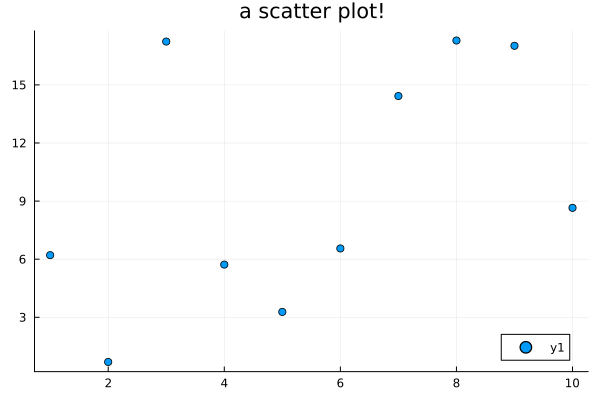

In [21]:
# creating data
using DataFrames
using StatsPlots

df = DataFrame(x=1:10, y=20*rand(10))

@df df scatter(:x, :y, title="a scatter plot!")

In [24]:
first(df, 10)

Row,x,y
,Int64,Float64
1,1,6.20857
2,2,0.693598
3,3,17.2373
4,4,5.72129
5,5,3.27772
6,6,6.55494
7,7,14.4245
8,8,17.2918
9,9,17.019


In [30]:
iris = dataset("datasets", "iris")
print(iris)

150×5 DataFrame
 Row │ SepalLength  SepalWidth  PetalLength  PetalWidth  Species    
     │ Float64      Float64     Float64      Float64     Cat…       
─────┼──────────────────────────────────────────────────────────────
   1 │         5.1         3.5          1.4         0.2  setosa
   2 │         4.9         3.0          1.4         0.2  setosa
   3 │         4.7         3.2          1.3         0.2  setosa
   4 │         4.6         3.1          1.5         0.2  setosa
   5 │         5.0         3.6          1.4         0.2  setosa
   6 │         5.4         3.9          1.7         0.4  setosa
   7 │         4.6         3.4          1.4         0.3  setosa
   8 │         5.0         3.4          1.5         0.2  setosa
   9 │         4.4         2.9          1.4         0.2  setosa
  10 │         4.9         3.1          1.5         0.1  setosa
  11 │         5.4         3.7          1.5         0.2  setosa
  12 │         4.8         3.4          1.6         0.2  setosa
  13 │   

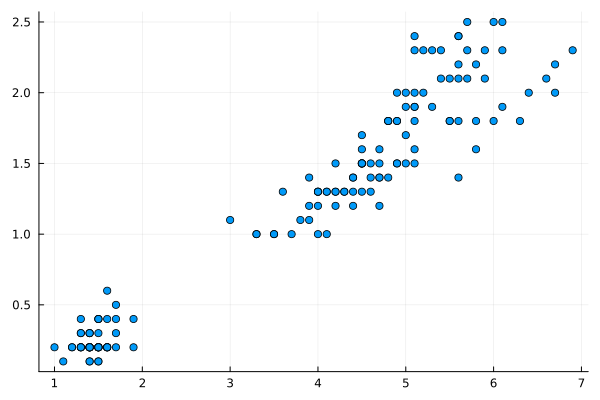

In [31]:
scatter(iris.PetalLength, iris.PetalWidth, legend = false)

In [39]:
X = iris[!, :PetalLength]
Y = iris[!, :PetalWidth]

150-element Vector{Float64}:
 0.2
 0.2
 0.2
 0.2
 0.2
 0.4
 0.3
 0.2
 0.2
 0.1
 0.2
 0.2
 0.1
 ⋮
 1.8
 2.1
 2.4
 2.3
 1.9
 2.3
 2.5
 2.3
 1.9
 2.0
 2.3
 1.8

In [42]:
using LinearAlgebra

# finding all possible euclidean distances
function calculateEuclideanDistances(X, Y)
    euclideanDistances = zeros(size(X)[1], size(Y)[1])

    for i in eachindex(X)
        for j in eachindex(Y)
            euclideanDistances[i, j] = norm(X[i]-Y[j])
        end
    end

    return euclideanDistances
end

print(calculateEuclideanDistances(X, Y))

[1.2 1.2 1.2 1.2 1.2 0.9999999999999999 1.0999999999999999 1.2 1.2 1.2999999999999998 1.2 1.2 1.2999999999999998 1.2999999999999998 1.2 0.9999999999999999 0.9999999999999999 1.0999999999999999 1.0999999999999999 1.0999999999999999 1.2 0.9999999999999999 1.2 0.8999999999999999 1.2 1.2 0.9999999999999999 1.2 1.2 1.2 1.2 0.9999999999999999 1.2999999999999998 1.2 1.2 1.2 1.2 1.2999999999999998 1.2 1.2 1.0999999999999999 1.0999999999999999 1.2 0.7999999999999999 0.9999999999999999 1.0999999999999999 1.2 1.2 1.2 1.2 0.0 0.10000000000000009 0.10000000000000009 0.09999999999999987 0.10000000000000009 0.09999999999999987 0.20000000000000018 0.3999999999999999 0.09999999999999987 0.0 0.3999999999999999 0.10000000000000009 0.3999999999999999 0.0 0.09999999999999987 0.0 0.10000000000000009 0.3999999999999999 0.10000000000000009 0.2999999999999998 0.40000000000000013 0.09999999999999987 0.10000000000000009 0.19999999999999996 0.09999999999999987 0.0 0.0 0.30000000000000004 0.10000000000000009 0.399

In [ ]:
# create similarity graph, or adjacency graph, using kNN approach

